# Example of DOV search methods for borehole samples (grondmonsters)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_grondmonsters.ipynb)

## Use cases explained below
* Get borehole samples in a bounding box
* Get borehole samples with specific properties
* Get borehole samples in a bounding box based on specific properties
* Select borehole samples in a municipality and return depth
* Get borehole samples, returning fields not available in the standard output dataframe

In [1]:
%matplotlib inline
import inspect, sys

In [2]:
# check pydov path
import pydov

## Get information about the datatype 'Grondmonster'

In [3]:
from pydov.search.grondmonster import GrondmonsterSearch
grondmonster = GrondmonsterSearch()

A description is provided for the 'Grondmonster' datatype:

In [4]:
print(grondmonster.get_description())

Grondmonsters in DOV zijn monsters die gekoppeld zijn aan een boring. Deze grondmonsters zijn gekenmerkt door een diepte ten opzichte van het maaiveld en door de manier van staalname. De geografische ligging (X en Y (mL72) en Z (mTAW)) nemen ze over van de gekoppelde boring. Aan deze grondmonsters zijn laboproeven, namelijk resultaten afkomstig van analyses in het laboratorium of enkel referenties naar bepaalde analyses, gekoppeld. De analyseresultaten van de monsters kunnen zeer divers zijn, namelijk onderkenningsproeven met centraal de korrelgrootteverdeling maar ook plasticiteitsgrenzen en humus- en kalkgehalte, metingen van volumemassa- en watergehalte en referenties van doorlatendheid, samendrukbaarheid en schuifweerstandkarakteristieken, glauconietgehalte en steenkoolanalyses. De gegevens van de monsters en de laboresultaten kunnen worden geëxporteerd in een rapport.


The different fields that are available for objects of the 'Grondmonster' datatype can be requested with the get_fields() method:

In [5]:
fields = grondmonster.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

boornummer
pkey_boring
naam
pkey_grondmonster
rapport
x
y
Z_mTAW
gemeente
diepte_van_m
diepte_tot_m
peil_van_mtaw
peil_tot_mtaw
monstertype
onderkenning
korrelverdeling
mechanisch
steenkool
chemisch
opdrachten
datum
astm_naam
grondsoort_bggg
humusgehalte
kalkgehalte
uitrolgrens
vloeigrens
glauconiet
korrelvolumemassa
volumemassa
watergehalte
diameter
fractie
methode


You can get more information of a field by requesting it from the fields dictionary:
* *name*: name of the field
* *definition*: definition of this field
* *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe.
* *notnull*: whether the field is mandatory or not
* *type*: datatype of the values of this field

In [6]:
fields['chemisch']

{'name': 'chemisch',
 'definition': 'Geeft aan of er chemische analyses uitgevoerd werden op het grondmonster.',
 'type': 'boolean',
 'notnull': False,
 'query': True,
 'cost': 1}

## Example use cases

### Get borehole samples in a bounding box

Get data for all the boreholes that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [7]:
from pydov.util.location import Within, Box

df = grondmonster.search(location=Within(Box(122000, 187000, 124000, 189000)))
df.head()

[000/039] cccccccccccccccccccccccccccccccccccccc.


,pkey_grondmonster,naam,pkey_boring,boornummer,datum,x,y,gemeente,diepte_van_m,diepte_tot_m,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet,korrelvolumemassa,volumemassa,watergehalte,diameter,fractie,methode
0,https://www.dov.vlaanderen.be/data/grondmonste...,N1,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B16,NaN,123929.39,188655.77,NaN,2.0,2.44,...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,5.6,0.0,ZEEFPROEF
1,https://www.dov.vlaanderen.be/data/grondmonste...,N1,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B16,NaN,123929.39,188655.77,NaN,2.0,2.44,...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.3,ZEEFPROEF
2,https://www.dov.vlaanderen.be/data/grondmonste...,N1,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B16,NaN,123929.39,188655.77,NaN,2.0,2.44,...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,2.8,0.7,ZEEFPROEF
3,https://www.dov.vlaanderen.be/data/grondmonste...,N1,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B16,NaN,123929.39,188655.77,NaN,2.0,2.44,...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.1,ZEEFPROEF
4,https://www.dov.vlaanderen.be/data/grondmonste...,N1,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B16,NaN,123929.39,188655.77,NaN,2.0,2.44,...,3.8,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.0,ZEEFPROEF


The dataframe contains borehole samples from 6 boreholes The available data are flattened to represent unique attributes per row of the dataframe.

Using the *pkey_grondmonster* field one can request the details of this borehole in a webbrowser:
https://www.dov.vlaanderen.be/data/grondmonster/*pkey_grondmonster*

In [8]:
for pkey_grondmonster in set(df.loc[df.boornummer == 'GEO-02/028-B5'].pkey_grondmonster):
    print(pkey_grondmonster)

https://www.dov.vlaanderen.be/data/grondmonster/2017-180446
https://www.dov.vlaanderen.be/data/grondmonster/2017-180450
https://www.dov.vlaanderen.be/data/grondmonster/2017-180452
https://www.dov.vlaanderen.be/data/grondmonster/2017-180444
https://www.dov.vlaanderen.be/data/grondmonster/2017-180443
https://www.dov.vlaanderen.be/data/grondmonster/2017-180447
https://www.dov.vlaanderen.be/data/grondmonster/2017-180449
https://www.dov.vlaanderen.be/data/grondmonster/2017-180451
https://www.dov.vlaanderen.be/data/grondmonster/2017-180445
https://www.dov.vlaanderen.be/data/grondmonster/2017-180448


There were 10 samples taken from the above borehole, each identified by its own URI.

### Get borehole samples with specific properties

Next to querying borehole samples based on their geographic location within a bounding box, we can also search for borehole samples matching a specific set of properties. For this we can build a query using a combination of the 'Grondmonster' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [9]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsEqualTo* operator to find all boreholes that are within the community (gemeente) of 'Wichelen':

In [10]:
from owslib.fes import PropertyIsEqualTo

query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Wichelen')
df = grondmonster.search(query=query)

df.head()

[000/101] cccccccccccccccccccccccccccccccccccccccccccccccccc
[050/101] cccccccccccccccccccccccccccccccccccccccccccccccccc
[100/101] c


,pkey_grondmonster,naam,pkey_boring,boornummer,datum,x,y,gemeente,diepte_van_m,diepte_tot_m,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet,korrelvolumemassa,volumemassa,watergehalte,diameter,fractie,methode
0,https://www.dov.vlaanderen.be/data/grondmonste...,N12,https://www.dov.vlaanderen.be/data/boring/2002...,GEO-02/071-B34,NaN,118827.31,189759.49,Wichelen,5.05,5.45,...,8.7,20.6,26.9,NaN,NaN,NaN,NaN,0.315,0.06,ZEEFPROEF
1,https://www.dov.vlaanderen.be/data/grondmonste...,N12,https://www.dov.vlaanderen.be/data/boring/2002...,GEO-02/071-B34,NaN,118827.31,189759.49,Wichelen,5.05,5.45,...,8.7,20.6,26.9,NaN,NaN,NaN,NaN,0.224,0.59,ZEEFPROEF
2,https://www.dov.vlaanderen.be/data/grondmonste...,N12,https://www.dov.vlaanderen.be/data/boring/2002...,GEO-02/071-B34,NaN,118827.31,189759.49,Wichelen,5.05,5.45,...,8.7,20.6,26.9,NaN,NaN,NaN,NaN,0.160,4.39,ZEEFPROEF
3,https://www.dov.vlaanderen.be/data/grondmonste...,N12,https://www.dov.vlaanderen.be/data/boring/2002...,GEO-02/071-B34,NaN,118827.31,189759.49,Wichelen,5.05,5.45,...,8.7,20.6,26.9,NaN,NaN,NaN,NaN,0.112,22.42,ZEEFPROEF
4,https://www.dov.vlaanderen.be/data/grondmonste...,N12,https://www.dov.vlaanderen.be/data/boring/2002...,GEO-02/071-B34,NaN,118827.31,189759.49,Wichelen,5.05,5.45,...,8.7,20.6,26.9,NaN,NaN,NaN,NaN,0.080,43.79,ZEEFPROEF


Once again we can use the *pkey_grondmonster* as a permanent link to the information of these boreholes:

In [11]:
for pkey_grondmonster in set(df.loc[df.boornummer == 'GEO-04/022-B4'].pkey_grondmonster):
    print(pkey_grondmonster)

https://www.dov.vlaanderen.be/data/grondmonster/2017-172409
https://www.dov.vlaanderen.be/data/grondmonster/2017-172383
https://www.dov.vlaanderen.be/data/grondmonster/2017-172367
https://www.dov.vlaanderen.be/data/grondmonster/2017-172394
https://www.dov.vlaanderen.be/data/grondmonster/2017-172401


### Get borehole samples in a bounding box based on specific properties

We can combine a query on attributes with a query on geographic location to get the borehole samples within a bounding box that have specific properties.

The following example requests the borehole samples with a depth greater than or equal to 15 meters within the given bounding box.

(Note that the datatype of the *literal* parameter should be a string, regardless of the datatype of this field in the output dataframe.)

In [12]:
from owslib.fes import PropertyIsGreaterThanOrEqualTo

query = PropertyIsGreaterThanOrEqualTo(
            propertyname='diepte_tot_m',
            literal='15')

df = grondmonster.search(
    location=Within(Box(122000, 187000, 124000, 189000)),
    query=query
    )

df.head()

[000/005] ccccc


,pkey_grondmonster,naam,pkey_boring,boornummer,datum,x,y,gemeente,diepte_van_m,diepte_tot_m,...,kalkgehalte,uitrolgrens,vloeigrens,glauconiet,korrelvolumemassa,volumemassa,watergehalte,diameter,fractie,methode
0,https://www.dov.vlaanderen.be/data/grondmonste...,N4A,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B20,NaN,122818.7,188410.48,NaN,15.75,15.9,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,2.80,0.0,ZEEFPROEF
1,https://www.dov.vlaanderen.be/data/grondmonste...,N4A,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B20,NaN,122818.7,188410.48,NaN,15.75,15.9,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.2,ZEEFPROEF
2,https://www.dov.vlaanderen.be/data/grondmonste...,N4A,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B20,NaN,122818.7,188410.48,NaN,15.75,15.9,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,1.40,0.5,ZEEFPROEF
3,https://www.dov.vlaanderen.be/data/grondmonste...,N4A,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B20,NaN,122818.7,188410.48,NaN,15.75,15.9,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.0,ZEEFPROEF
4,https://www.dov.vlaanderen.be/data/grondmonste...,N4A,https://www.dov.vlaanderen.be/data/boring/2009...,GEO-08/231-B20,NaN,122818.7,188410.48,NaN,15.75,15.9,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,0.71,2.2,ZEEFPROEF


### Select borehole samples in a municipality and return depth

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the borehole samples in the city of Ghent and return their depth:

In [13]:
query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Gent')
df = grondmonster.search(query=query,
                   return_fields=('diepte_tot_m',))

df.head()

,diepte_tot_m
0,5.0
1,8.0
2,12.0
3,9.0
4,3.0


In [14]:
df.describe()

,diepte_tot_m
count,720.000000
mean,10.657528
std,8.194455
min,0.700000
25%,3.900000
50%,8.400000
75%,15.470000
max,40.400000


Text(0.5, 1.0, 'Depth distribution borehole samples in Gent')

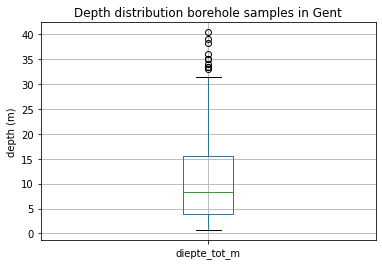

In [15]:
ax = df[df.diepte_tot_m != 0].boxplot()
ax.set_ylabel("depth (m)")
ax.set_title("Depth distribution borehole samples in Gent")

## Get borehole samples, returning fields not available in the standard output dataframe

To keep the output dataframe size acceptable, not all available WFS fields are included in the standard output. However, one can use this information to select borehole samples as illustrated below.

For example, make a selection of the borehole samples in the municipality of Antwerp, for which a mechanical test was carried out

In [16]:
from owslib.fes import And

query = And([PropertyIsEqualTo(propertyname='gemeente',
                               literal='Antwerpen'),
             PropertyIsEqualTo(propertyname='mechanisch', 
                               literal='True')]
            )
df = grondmonster.search(query=query,
                   return_fields=('pkey_grondmonster', 'boornummer', 'x', 'y'))
df.head()

,pkey_grondmonster,boornummer,x,y
0,https://www.dov.vlaanderen.be/data/grondmonste...,1445-GEO-17/047-B211,152332.42,214430.82
1,https://www.dov.vlaanderen.be/data/grondmonste...,1445-GEO-17/047-B211,152332.42,214430.82
2,https://www.dov.vlaanderen.be/data/grondmonste...,1445-GEO-17/047-B211,152332.42,214430.82
3,https://www.dov.vlaanderen.be/data/grondmonste...,1445-GEO-17/047-B211,152332.42,214430.82
4,https://www.dov.vlaanderen.be/data/grondmonste...,GEO-95/103-b14,143630.00,226985.00


The data from the mechanical tests are not always available through the webservice. Following the URI of the borehole sample, one can access the available information in the subtype 'mechanisch'.

In [17]:
for pkey_grondmonster in set(df.loc[df.boornummer=='1445-GEO-17/047-B211'].pkey_grondmonster):
    print(pkey_grondmonster)

https://www.dov.vlaanderen.be/data/grondmonster/2018-211728
https://www.dov.vlaanderen.be/data/grondmonster/2018-211656
https://www.dov.vlaanderen.be/data/grondmonster/2018-211727
https://www.dov.vlaanderen.be/data/grondmonster/2018-211729


## Visualize results

Using Folium, we can display the results of our search on a map.

In [18]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [19]:
# convert the coordinates to lat/lon for folium
def convert_latlon(x1, y1):
    transformer = Transformer.from_crs("epsg:31370", "epsg:4326", always_xy=True)
    x2,y2 = transformer.transform(x1, y1)
    return x2, y2

df['lon'], df['lat'] = zip(*map(convert_latlon, df['x'], df['y'])) 
# convert to list
loclist = df[['lat', 'lon']].values.tolist()

In [20]:
# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(fmap)
for loc in range(0, len(loclist)):
    folium.Marker(loclist[loc], popup=df['boornummer'][loc]).add_to(marker_cluster)
fmap
